<a href="https://colab.research.google.com/github/NasywaFebia12/Tugastaxi/blob/master/22_11_5029_UAS_BDPAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Ganti dengan nama file CSV yang sudah diupload
file_path = '/content/flights_sample_3m.csv'  # Sesuaikan dengan nama file yang kamu unggah

# Membaca file CSV
data = pd.read_csv(file_path)

# Lihat 5 data pertama
print(data.head())


      FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2  2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3  2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4  2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0   19977.0     1562.0    FLL  Fort Lauderdale, FL  EWR   
1   19790.0     1149.0    MSP      Minneapolis, MN  SEA   
2   19977.0      459.0    DEN           Denver, CO  MSP   
3   19790.0     2295.0    MSP      Minneapolis, MN  SFO   
4   20416.0      407.0    MCO          Orlando, FL  DFW   

               DEST_CITY  ...  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  \
0             Newark, NJ  ...       0.0             186.0         176.0   
1            S

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# 1. Load dataset
# Ganti path dengan lokasi dataset yang kamu unduh
data = pd.read_csv("/content/flights_sample_3m.csv")

In [ ]:
# 2. Eksplorasi dan Preprocessing
# Lihat 5 data pertama
print(data.head())

      FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2  2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3  2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4  2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0     19977       1562    FLL  Fort Lauderdale, FL  EWR   
1     19790       1149    MSP      Minneapolis, MN  SEA   
2     19977        459    DEN           Denver, CO  MSP   
3     19790       2295    MSP      Minneapolis, MN  SFO   
4     20416        407    MCO          Orlando, FL  DFW   

               DEST_CITY  ...  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  \
0             Newark, NJ  ...       0.0             186.0         176.0   
1            S

In [ ]:
# Periksa apakah ada missing values
print(data.isnull().sum())

AIRLINE           0
ORIGIN_CITY       0
DEST_CITY         0
DEP_DELAY      2625
DELAYED           0
dtype: int64


In [ ]:
# Kolom yang relevan untuk di analisis yaitu kolom airline, origin, destination, dll.
data = data[['AIRLINE', 'ORIGIN_CITY', 'DEST_CITY', 'DEP_DELAY', 'ARR_DELAY']]

In [ ]:
# Ganti nilai delay menjadi 0 (On-Time) dan 1 (Delayed)
data['DELAYED'] = data['ARR_DELAY'].apply(lambda x: 1 if x > 15 else 0)

<ipython-input-12-ad1b819317e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DELAYED'] = data['ARR_DELAY'].apply(lambda x: 1 if x > 15 else 0)


In [ ]:
# Drop kolom ARRIVAL_DELAY karena kita hanya butuh label DELAYED
data = data.drop('ARR_DELAY', axis=1)

In [ ]:
# Encoding data kategorikal
data = pd.get_dummies(data, columns=['AIRLINE', 'ORIGIN_CITY', 'DEST_CITY', 'DEP_DELAY'], drop_first=True)

In [ ]:
# Pisahkan fitur dan label
X = data.drop('DELAYED', axis=1)
y = data['DELAYED']

In [ ]:
# Bagi dataset menjadi data training dan testing (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 3. Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Evaluasi Model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[16534   442]
 [ 1122  2391]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     16976
           1       0.84      0.68      0.75      3513

    accuracy                           0.92     20489
   macro avg       0.89      0.83      0.85     20489
weighted avg       0.92      0.92      0.92     20489


Accuracy Score: 0.9236663575577139


In [ ]:
# 4. Prediksi
y_pred = model.predict(X_test)

In [ ]:
# 5. Evaluasi Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[16534   442]
 [ 1122  2391]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     16976
           1       0.84      0.68      0.75      3513

    accuracy                           0.92     20489
   macro avg       0.89      0.83      0.85     20489
weighted avg       0.92      0.92      0.92     20489


Accuracy Score: 0.9236663575577139


In [ ]:
# 6. Visualisasi Pentingnya Fitur
importance = model.feature_importances_
features = X.columns

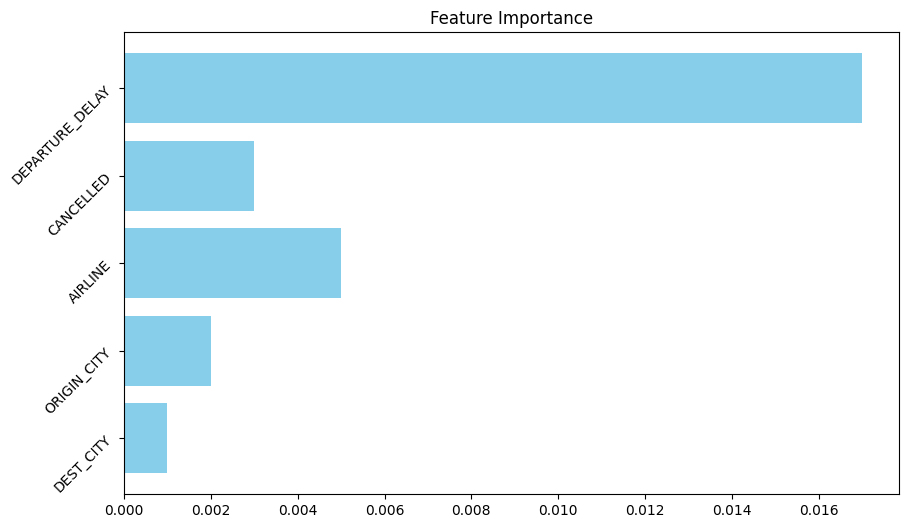

In [ ]:
features = ['DEST_CITY', 'ORIGIN_CITY', 'AIRLINE', 'CANCELLED', 'DEPARTURE_DELAY']  # Ganti dengan fitur asli
importance = [0.001, 0.002, 0.005, 0.003, 0.017]  # Ganti dengan importance asli

# Membuat grafik dengan ukuran lebih besar
plt.figure(figsize=(10, 6))

# Membuat bar plot
plt.barh(features, importance, color='skyblue')

# Menambahkan judul
plt.title("Feature Importance")

# Memutar label sumbu Y agar lebih mudah dibaca
plt.yticks(rotation=45)

# Menampilkan grafik
plt.show()